In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

In [2]:
July12 = pd.read_csv('files/07-12-2020.csv')

In [3]:
July12.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [4]:
July12.sample(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
2,American Samoa,US,2020-07-13 04:43:16,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,816.0,NaN,NaN,16,ASM,1466.544455,NaN
13,Grand Princess,US,2020-07-13 04:43:16,NaN,NaN,103,3,NaN,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN
45,Rhode Island,US,2020-07-13 04:43:16,41.6809,-71.5118,17312,976,1685.0,14651.0,44,1634.192688,166655.0,2051.0,5.637708,84000044,USA,15731.653327,11.847274
18,Indiana,US,2020-07-13 04:43:16,39.8494,-86.2583,51612,2760,38623.0,10229.0,18,766.641727,564647.0,7527.0,5.347594,84000018,USA,8387.234580,14.583818
8,Delaware,US,2020-07-13 04:43:16,39.3185,-75.5071,12804,517,7120.0,5167.0,10,1314.897655,137409.0,NaN,4.037801,84000010,USA,14111.119327,NaN


## Top 20 States with Highest Cases 

In [5]:
Top20_confirmed_states = July12.sort_values('Confirmed', ascending = False).head(20)['Province_State'].unique()
df = July12.loc[July12.Province_State.isin(Top20_confirmed_states)].sort_values('Confirmed', ascending = False)
df['Positive_Rate'] = df['Confirmed']/df['People_Tested']*100

In [6]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate,Positive_Rate
36,New York,US,2020-07-13 04:43:16,42.1657,-74.9481,401706,32350,71565.0,297791.0,36,2064.948417,4673195.0,89995.0,8.053153,84000036,USA,24022.311391,22.403200,8.595961
5,California,US,2020-07-13 04:43:16,36.1162,-119.6816,324543,7051,NaN,317492.0,6,821.373680,5406599.0,NaN,2.172593,84000006,USA,13683.358185,NaN,6.002720
11,Florida,US,2020-07-13 04:43:16,27.7663,-81.6868,269811,4242,NaN,265569.0,12,1256.235701,2574007.0,18590.0,1.572212,84000012,USA,11984.535428,6.890008,10.482139
49,Texas,US,2020-07-13 04:43:16,31.0545,-97.5635,262762,3216,132638.0,126908.0,48,906.204574,2492754.0,NaN,1.223921,84000048,USA,8596.924508,NaN,10.541032
34,New Jersey,US,2020-07-13 04:43:16,40.2989,-74.5210,175298,15525,31190.0,128583.0,34,1973.589847,1685604.0,20632.0,8.856347,84000034,USA,18977.346803,11.769672,10.399714


### Incidence Rate
- Confirmed cases per 100,000 persons.

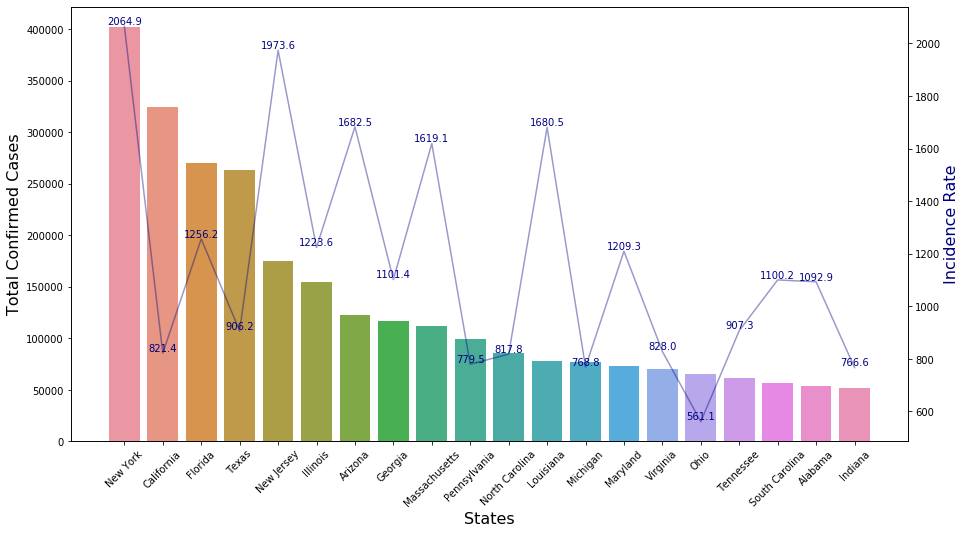

In [7]:
fig,ax1 = plt.subplots(figsize = (15,8))
ax1 = sns.barplot(x ='Province_State', y = 'Confirmed', data = df)
ax1.set_xlabel('States', fontsize = 16)
ax1.set_ylabel('Total Confirmed Cases', fontsize = 16)
ax1.tick_params(axis = 'y')
ax1.tick_params(axis = 'x',labelrotation = 45)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'Province_State', y = 'Incident_Rate',data = df, sort = False,color = 'navy', alpha = 0.4)
ax2.set_ylabel('Incidence Rate', fontsize = 16, color = 'navy')
ax2.tick_params(axis='y')

for index, row in df.iterrows():
    ax2.text(row.Province_State, row.Incident_Rate, round(row.Incident_Rate,1), color='navy', ha="center",va='bottom')
plt.show();

### Mortality Rate
- Number recorded deaths * 100/ Number confirmed cases.

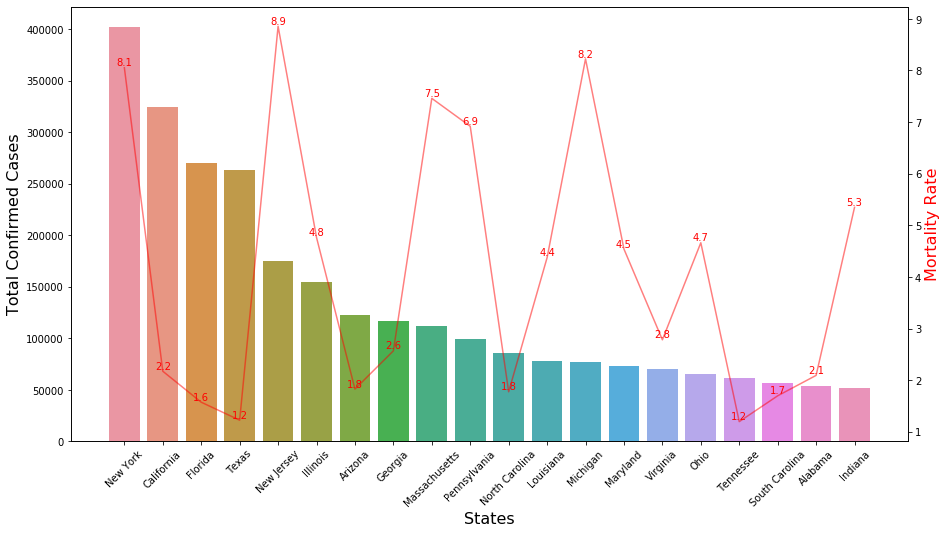

In [8]:
fig,ax1 = plt.subplots(figsize = (15,8))
ax1 = sns.barplot(x ='Province_State', y = 'Confirmed', data = df)
ax1.set_xlabel('States', fontsize = 16)
ax1.set_ylabel('Total Confirmed Cases', fontsize = 16)
ax1.tick_params(axis = 'y')
ax1.tick_params(axis = 'x',labelrotation = 45)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'Province_State', y = 'Mortality_Rate',sort= False, data = df,color = 'red', alpha = 0.5)
ax2.set_ylabel('Mortality Rate', fontsize = 16, color = 'red')
ax2.tick_params(axis='y')

for index, row in df.iterrows():
    ax2.text(row.Province_State, row.Mortality_Rate, round(row.Mortality_Rate,1), color='red', ha="center", va = 'bottom')
plt.show();

Mortality rates are high in New York, New Jersey, Massachusetts, Pensylvania and Michigan. It would be interesting to analyze patients' demographic to fully understand the difference in mortality rate. 

### Testing Rate
- Total number of people tested per 100,000 persons.

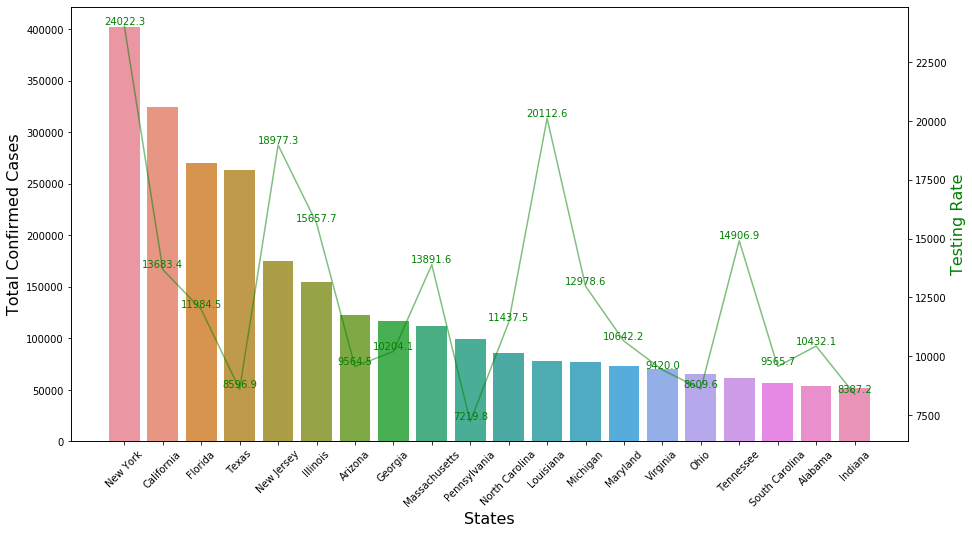

In [9]:
fig,ax1 = plt.subplots(figsize = (15,8))
ax1 = sns.barplot(x ='Province_State', y = 'Confirmed', data = df)
ax1.set_xlabel('States', fontsize = 16)
ax1.set_ylabel('Total Confirmed Cases', fontsize = 16)
ax1.tick_params(axis = 'y')
ax1.tick_params(axis = 'x',labelrotation = 45)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'Province_State', y = 'Testing_Rate',sort= False, data = df,color = 'green', alpha = 0.5)
ax2.set_ylabel('Testing Rate', fontsize = 16, color = 'green')
ax2.tick_params(axis='y')

for index, row in df.iterrows():
    ax2.text(row.Province_State, row.Testing_Rate, round(row.Testing_Rate,1), color='green', ha="center", va = 'bottom')

plt.show();

New York, New Jersey, Louisiana and Tennessee have the highest testing rate.

### Positive Rate
- Total number of confirmed cases *100/Number of tests

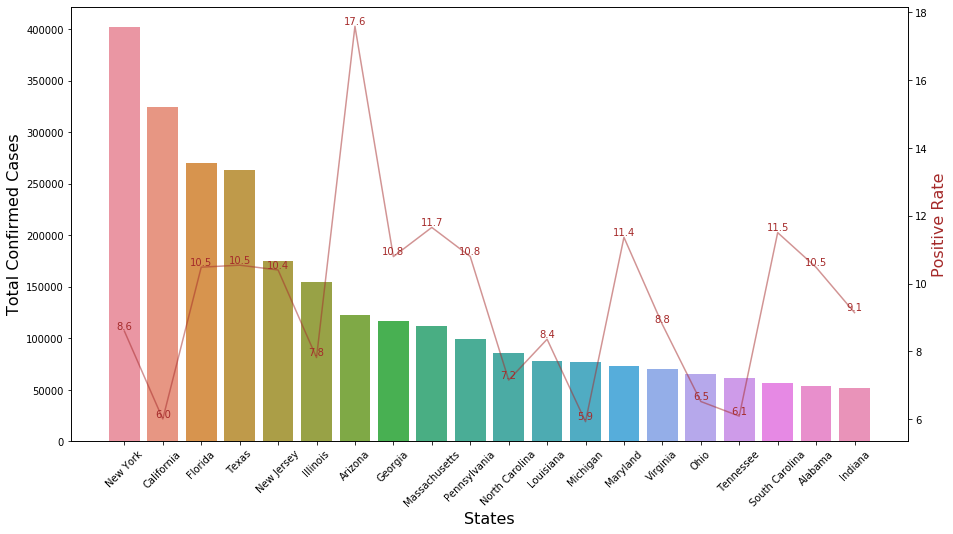

In [10]:
fig,ax1 = plt.subplots(figsize = (15,8))
ax1 = sns.barplot(x ='Province_State', y = 'Confirmed', data = df)
ax1.set_xlabel('States', fontsize = 16)
ax1.set_ylabel('Total Confirmed Cases', fontsize = 16)
ax1.tick_params(axis = 'y')
ax1.tick_params(axis = 'x',labelrotation = 45)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'Province_State', y = 'Positive_Rate',sort= False, data = df, color = 'brown', alpha = 0.5)
ax2.set_ylabel('Positive Rate', fontsize = 16, color = 'brown')
ax2.tick_params(axis='y')

for index, row in df.iterrows():
    ax2.text(row.Province_State, row.Positive_Rate, round(row.Positive_Rate,1), color='brown', ha="center", va = 'bottom')

plt.show();

All 20 states have positivity rate higher than WHO's recommended rate of 5%, suggesting that all 20 states are not testing enough. Arizona has the highest positivity rate of 17.6%; it needs to increase its testing capability significantly to better understand and control the spread of COVID 19.